In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Step 1: Check for Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.fit(df[['bmi']])
df[['bmi']] = imputer.transform(df[['bmi']])

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

As we have around 5100 datas in total, we drop the rows with null avlues

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Remove unused columns
df.drop(['id'],axis=1,inplace=True)

<AxesSubplot:>

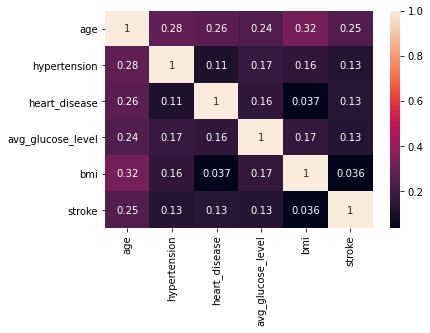

In [ ]:
sns.heatmap(df.corr(),annot=True)

From the correlation map, we can't any relationship of features and our target(stroke) as the correlation values are close to 0

<AxesSubplot:xlabel='bmi'>

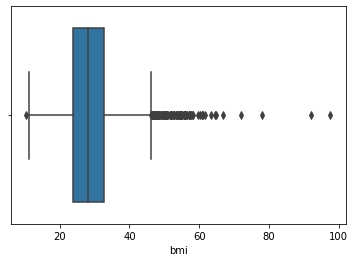

In [ ]:
sns.boxplot(x='bmi',data=df)

Outliers can be observed from the box plot

In [ ]:
# Remove outliers in bmi
bmi_lq = df.describe().iloc[-2,-2]
bmi_uq = df.describe().iloc[4,-2]
bmi_iqr = bmi_uq-bmi_lq
df = df.loc[df['bmi']<bmi_uq+1.5*bmi_lq]
df = df.drop(df.loc[df['gender']=='Other'].index)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
# Encoding 1,0
df['gender'] = df['gender'].replace({'Male':1,'Female':0})
df['Residence_type'] = df['Residence_type'].replace({'Urban':1,'Rural':0})
df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0})
df
# df['Residence_type']=pd.get_dummies(df['Residence_type'])
# df[['gender','work_type','Residence_type','smoking_status']].value_counts()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5101,0,80.0,1,0,1,Private,1,83.75,28.1,never smoked,0
5102,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5103,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5104,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [ ]:
# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
df2 = df[['work_type','smoking_status']]
encoded_df = encoder.fit_transform(df2).toarray()
encoded_df

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names(df2.columns))
encoded_df

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
5101,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5102,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5103,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5104,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df = df.drop(['work_type','smoking_status'],axis=1)

In [ ]:
processed_df = pd.concat([df,encoded_df],axis=1)
processed_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,0,202.21,28.1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.92,32.5,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,49.0,0,0,1,1,171.23,34.4,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,79.0,1,0,1,0,174.12,24.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,0,80.0,1,0,1,1,83.75,28.1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5102,0,81.0,0,0,1,1,125.20,40.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5103,0,35.0,0,0,1,0,82.99,30.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5104,1,51.0,0,0,1,0,166.29,25.6,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
processed_df['stroke'].value_counts()
# Imbalance dataset
# --> Sampling

0    4857
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

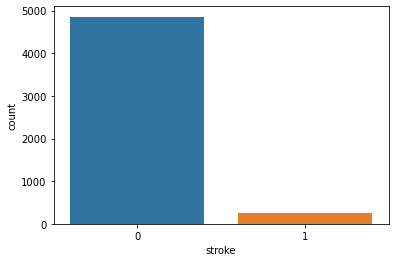

In [ ]:
sns.countplot(x='stroke',data=processed_df)

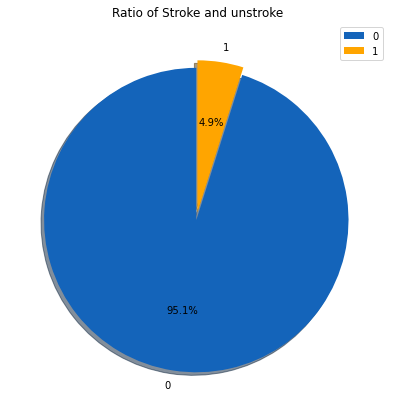

In [ ]:
labels =processed_df['stroke'].value_counts(sort = True).index
sizes = processed_df['stroke'].value_counts(sort = True)

colors = ["#1464BA","orange"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
# explode --> extruded out
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.legend()
plt.title('Ratio of Stroke and unstroke')
plt.show()

In [ ]:
non_indep_vars = [
    'stroke',  # this is the target
    'smoking_status_formerly smoked', # we've decided to drop smoking_status column
    'smoking_status_never smoked',
    'smoking_status_smokes'
]

In [ ]:
X = processed_df.drop(columns = non_indep_vars)
y = processed_df['stroke']
print(X.shape)
print(y.shape)

(5106, 12)
(5106,)


In [ ]:
# Before Sampling, accuracy score , ROC AUC
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




Logistic Regression (Default Weights)

In [ ]:
log_clf = Pipeline([
#    ( 'column-onehot', col_trans ),
    ( 'classifier', LogisticRegression() )
])
hyperparams = { 
    'classifier__C': np.arange(0, 1, 0.01),
}

log_search = GridSearchCV(log_clf,  hyperparams, n_jobs = -1)
log_search.fit(X_train_scaled, y_train)
y_pred = log_search.predict(X_test_scaled)
print("Best params", log_search.best_params_)
print("Best score", log_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])

Best params {'classifier__C': 0.01}
Best score 0.9537220702234382
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

[0, 0]
[60, 962]


Logistic Regression (Weights considered)

In [ ]:
log_clf = Pipeline([
#    ( 'column-onehot', col_trans ),
    ( 'classifier', LogisticRegression() )
])
hyperparams = { 
    'classifier__C': np.arange(0, 1, 0.01),
    'classifier__class_weight': ['balanced']
}

log_search = GridSearchCV(log_clf,  hyperparams, n_jobs = -1)
log_search.fit(X_train_scaled, y_train)
y_pred = log_search.predict(X_test_scaled)
print("Best params", log_search.best_params_)
print("Best score", log_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])

C = log_search.best_params_['classifier__C']
log_class_weight = log_search.best_params_['classifier__class_weight']

Best params {'classifier__C': 0.34, 'classifier__class_weight': 'balanced'}
Best score 0.7331011351909185
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       962
           1       0.17      0.82      0.29        60

    accuracy                           0.76      1022
   macro avg       0.58      0.79      0.57      1022
weighted avg       0.94      0.76      0.82      1022

[49, 232]
[11, 730]


KNN (Default Weights)

In [ ]:
knn_clf = Pipeline([
    ( 'classifier', KNeighborsClassifier() )
])
hyperparams = { 
    'classifier__n_neighbors': np.arange(1,100,2),
}

knn_search = GridSearchCV(knn_clf,  hyperparams, n_jobs = -1)
knn_search.fit(X_train_scaled, y_train)
y_pred = knn_search.predict(X_test_scaled)
print("Best params", knn_search.best_params_)
print("Best score", knn_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])


Best params {'classifier__n_neighbors': 13}
Best score 0.9537220702234382
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

[0, 0]
[60, 962]


KNN (Weights considered)

In [ ]:
knn_clf = Pipeline([
    ( 'classifier', KNeighborsClassifier() )
])
hyperparams = { 
    'classifier__n_neighbors': np.arange(1,100,2),
    'classifier__weights': ['distance']
}

knn_search = GridSearchCV(knn_clf,  hyperparams, n_jobs = -1)
knn_search.fit(X_train_scaled, y_train)
y_pred = knn_search.predict(X_test_scaled)
print("Best params", knn_search.best_params_)
print("Best score", knn_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])
n_neighbors = knn_search.best_params_['classifier__n_neighbors']
knn_weights = knn_search.best_params_['classifier__weights']

Best params {'classifier__n_neighbors': 37, 'classifier__weights': 'distance'}
Best score 0.9537220702234382
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

[0, 0]
[60, 962]


Decision Tree (Default Weight)

In [ ]:
tree_clf = Pipeline([
    ( 'classifier', DecisionTreeClassifier() )
])
hyperparams = { 
    'classifier__max_depth': [2,6,8],
    'classifier__max_leaf_nodes': [5,20,100]
}

tree_search = GridSearchCV(tree_clf,  hyperparams, n_jobs = -1)
tree_search.fit(X_train_scaled, y_train)
y_pred = tree_search.predict(X_test_scaled)
print("Best params", tree_search.best_params_)
print("Best score", tree_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])


Best params {'classifier__max_depth': 2, 'classifier__max_leaf_nodes': 5}
Best score 0.953232474140207
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

[0, 0]
[60, 962]


Decision Tree (Weights considered)

In [ ]:
tree_clf = Pipeline([
    ( 'classifier', DecisionTreeClassifier() )
])
hyperparams = { 
    'classifier__max_depth': [2,6,8],
    'classifier__max_leaf_nodes': [5,20,100],
    'classifier__class_weight': ['balanced']
}

tree_search = GridSearchCV(tree_clf,  hyperparams, n_jobs = -1)
tree_search.fit(X_train_scaled, y_train)
y_pred = tree_search.predict(X_test_scaled)
print("Best params", tree_search.best_params_)
print("Best score", tree_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])
max_depth = tree_search.best_params_['classifier__max_depth']
max_leaf_nodes = tree_search.best_params_['classifier__max_leaf_nodes']
tree_class_weight = tree_search.best_params_['classifier__class_weight']

Best params {'classifier__class_weight': 'balanced', 'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 100}
Best score 0.7823145414836682
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       962
           1       0.16      0.57      0.25        60

    accuracy                           0.80      1022
   macro avg       0.56      0.69      0.56      1022
weighted avg       0.92      0.80      0.85      1022

[34, 182]
[26, 780]


Random Forest (Default Weight)

In [ ]:
forest_clf = Pipeline([
    ( 'classifier', RandomForestClassifier() )
])
hyperparams = { 
    'classifier__n_estimators': [100],
    'classifier__max_depth': [2,6,8],
    'classifier__max_leaf_nodes': [5,20,100]

}

forest_search = GridSearchCV(forest_clf,  hyperparams, n_jobs = -1)
forest_search.fit(X_train_scaled, y_train)
y_pred = forest_search.predict(X_test_scaled)
print("Best params", forest_search.best_params_)
print("Best score", forest_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])


Best params {'classifier__max_depth': 2, 'classifier__max_leaf_nodes': 5, 'classifier__n_estimators': 100}
Best score 0.9537220702234382
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

[0, 0]
[60, 962]


Random Forest (Weights considered)

In [ ]:
forest_clf = Pipeline([
    ( 'classifier', RandomForestClassifier() )
])
hyperparams = { 
    'classifier__n_estimators': [100],
    'classifier__max_depth': [2,6,8],
    'classifier__max_leaf_nodes': [5,20,100],
    'classifier__class_weight':["balanced", "balanced_subsample"]
}

forest_search = GridSearchCV(forest_clf,  hyperparams, n_jobs = -1)
forest_search.fit(X_train_scaled, y_train)
y_pred = forest_search.predict(X_test_scaled)
print("Best params", forest_search.best_params_)
print("Best score", forest_search.best_score_)
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print([tp,fp])
print([fn,tn])
n_estimators = forest_search.best_params_['classifier__n_estimators']
forest_max_depth = forest_search.best_params_['classifier__max_depth']
forest_max_leaf_nodes = forest_search.best_params_['classifier__max_leaf_nodes']
forest_class_weight = forest_search.best_params_['classifier__class_weight']

Best params {'classifier__class_weight': 'balanced_subsample', 'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 100, 'classifier__n_estimators': 100}
Best score 0.8746322029423765
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       962
           1       0.23      0.52      0.31        60

    accuracy                           0.87      1022
   macro avg       0.60      0.70      0.62      1022
weighted avg       0.92      0.87      0.89      1022

[31, 106]
[29, 856]


In [ ]:
algorithm = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']
hyperparameters = [LogisticRegression(C= C, class_weight= log_class_weight), KNeighborsClassifier(n_neighbors= n_neighbors, weights= knn_weights), DecisionTreeClassifier(max_depth= max_depth, max_leaf_nodes= max_leaf_nodes, class_weight= tree_class_weight),RandomForestClassifier(n_estimators=n_estimators,max_depth=forest_max_depth,max_leaf_nodes=forest_max_leaf_nodes,class_weight=forest_class_weight)]

In [ ]:
models=dict(zip(algorithm,hyperparameters))
print(models)

{'LogisticRegression': LogisticRegression(C=0.34, class_weight='balanced'), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=37, weights='distance'), 'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=100), 'RandomForestClassifier': RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_leaf_nodes=100)}


LogisticRegression 0.7622309197651663
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       962
           1       0.17      0.82      0.29        60

    accuracy                           0.76      1022
   macro avg       0.58      0.79      0.57      1022
weighted avg       0.94      0.76      0.82      1022

[49, 232]
[11, 730]


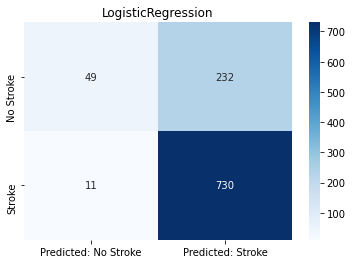

<Figure size 720x360 with 0 Axes>

KNeighborsClassifier 0.9412915851272016
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

[0, 0]
[60, 962]


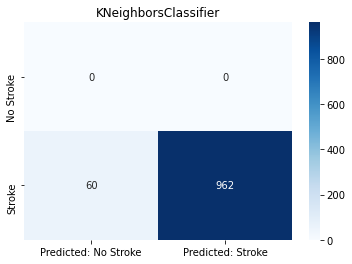

<Figure size 720x360 with 0 Axes>

DecisionTreeClassifier 0.7964774951076321
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       962
           1       0.16      0.57      0.25        60

    accuracy                           0.80      1022
   macro avg       0.56      0.69      0.56      1022
weighted avg       0.92      0.80      0.85      1022

[34, 182]
[26, 780]


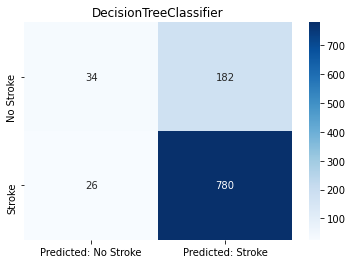

<Figure size 720x360 with 0 Axes>

RandomForestClassifier 0.8747553816046967
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       962
           1       0.23      0.48      0.31        60

    accuracy                           0.87      1022
   macro avg       0.60      0.69      0.62      1022
weighted avg       0.92      0.87      0.89      1022

[29, 97]
[31, 865]


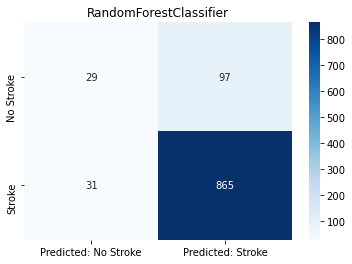

<Figure size 720x360 with 0 Axes>

[0.17437722419928825, 0.0, 0.1574074074074074, 0.23015873015873015]


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
predicted =[]
precision_score_list=[]
for name,algo in models.items():
    model=algo
    model.fit(X_train_scaled,y_train)
    predict = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, predict)
    pre_score = precision_score(y_test, predict)
    predicted.append(acc)
    precision_score_list.append(pre_score)

    print(name,acc)
    print(classification_report(y_test, predict))
    tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
    print([tp,fp])
    print([fn,tn])
    ax = plt.axes()
    ax.set_title(name)
    plt.figure(figsize=(10,5))
    cm_data = [tp, fp], [fn, tn]
    conf_matrix = pd.DataFrame(data=cm_data,columns=['Predicted: No Stroke','Predicted: Stroke'],index=['No Stroke','Stroke'])
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues",ax=ax)
    plt.show()

print(precision_score_list)
plt.figure(figsize = (10,5))
sns.barplot(x = precision_score_list, y = algorithm , palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [ ]:
a= classification_report(y_test, predict)['precision']
print(a)

TypeError: string indices must be integers

In [ ]:
cm_data = [tp, fp], [fn, tn]
conf_matrix = pd.DataFrame(data=cm_data)
conf_matrix

,0,1
0,31,105
1,29,857


Text(0.5, 1.0, 'Plotting the Model Accuracies')

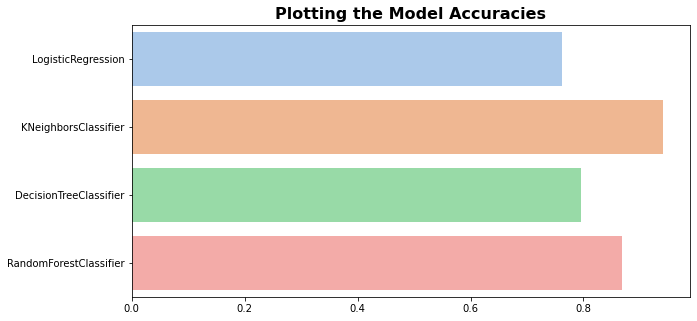

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = algorithm, palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")